<a href="https://colab.research.google.com/github/StillWork/AIPM/blob/main/PM_RUL_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 설정

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 읽기

In [70]:
data=pd.read_csv('https://raw.githubusercontent.com/SRIKALYAN03/Predictive-Maintenance-of-Machines/refs/heads/main/predictive_maintenance_dataset(1).csv')
print(data.shape)
data[:5]

(124135, 12)


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,01-01-2003,S1F01085,0,203606672,55,0,52,6,407438,0,0,7
1,01-01-2003,S1F0046B,0,60050680,0,3,0,6,400654,0,0,0
2,01-01-2003,S1F01E6Y,0,50655968,0,0,0,12,117394,0,0,0
3,01-01-2003,S1F01JE0,0,79694012,0,0,0,6,410066,0,0,0
4,01-01-2003,S1F01R2B,0,3970480,0,0,0,3,61053,0,0,3


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124135 entries, 0 to 124134
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124135 non-null  object
 1   device   124135 non-null  object
 2   failure  124135 non-null  int64 
 3   metric1  124135 non-null  int64 
 4   metric2  124135 non-null  int64 
 5   metric3  124135 non-null  int64 
 6   metric4  124135 non-null  int64 
 7   metric5  124135 non-null  int64 
 8   metric6  124135 non-null  int64 
 9   metric7  124135 non-null  int64 
 10  metric8  124135 non-null  int64 
 11  metric9  124135 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [72]:
data['date']=pd.to_datetime(data['date'],errors='coerce')
data[:5]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2003-01-01,S1F01085,0,203606672,55,0,52,6,407438,0,0,7
1,2003-01-01,S1F0046B,0,60050680,0,3,0,6,400654,0,0,0
2,2003-01-01,S1F01E6Y,0,50655968,0,0,0,12,117394,0,0,0
3,2003-01-01,S1F01JE0,0,79694012,0,0,0,6,410066,0,0,0
4,2003-01-01,S1F01R2B,0,3970480,0,0,0,3,61053,0,0,3


In [73]:
data=data.sort_values(by=['device','date'])
data[:5]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
471,2003-01-01,S1F00112,0,50004094,0,0,0,8,80901,0,0,0
11731,2003-01-01,S1F00112,0,66408032,0,0,0,8,95874,0,0,0
20312,2003-01-01,S1F00112,0,60439704,0,0,0,8,99709,0,0,0
1634,2003-01-02,S1F00112,0,70097400,0,0,0,8,82032,0,0,0
12463,2003-01-02,S1F00112,0,207090488,0,0,0,8,97001,0,0,0


In [74]:
data.isnull().sum()

,0
date,3580
device,0
failure,0
metric1,0
metric2,0
metric3,0
metric4,0
metric5,0
metric6,0
metric7,0


In [75]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120555 entries, 471 to 67274
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     120555 non-null  datetime64[ns]
 1   device   120555 non-null  object        
 2   failure  120555 non-null  int64         
 3   metric1  120555 non-null  int64         
 4   metric2  120555 non-null  int64         
 5   metric3  120555 non-null  int64         
 6   metric4  120555 non-null  int64         
 7   metric5  120555 non-null  int64         
 8   metric6  120555 non-null  int64         
 9   metric7  120555 non-null  int64         
 10  metric8  120555 non-null  int64         
 11  metric9  120555 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 12.0+ MB


In [76]:
# 디바이스 종류
data['device'].nunique()

1169

In [77]:
# 디바이스별 센서 데이터 수
data['device'].value_counts()

,count
device,
Z1F0QL3N,294
Z1F0MA1S,294
Z1F0QK05,294
Z1F0QLC1,294
Z1F0Q8RT,294
...,...
Z1F1AGW1,5
S1F003F0,5
S1F04KSC,4


<Axes: xlabel='device'>

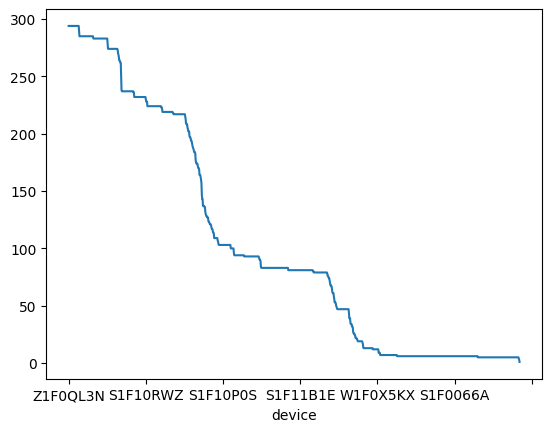

In [78]:
# 디바이스별 센서 수 그래프
data['device'].value_counts().plot()

In [79]:
# 오류가 발생한 횟수 (failure = 1)
data['failure'].value_counts()

,count
failure,
0,120455
1,100


In [80]:
# 고장이력이 있는 디바이스 찾기
# 'failure' 값이 1을 포함하는 device 목록 찾기

devices_with_failure = data[data['failure'] == 1]['device'].unique()
len(devices_with_failure)

100

In [81]:
# 'failure' 값이 1을 포함하는 device 데이터만 취합 (나머지는 버림)
data = data[data['device'].isin(devices_with_failure)].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9786 entries, 473 to 95732
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     9786 non-null   datetime64[ns]
 1   device   9786 non-null   object        
 2   failure  9786 non-null   int64         
 3   metric1  9786 non-null   int64         
 4   metric2  9786 non-null   int64         
 5   metric3  9786 non-null   int64         
 6   metric4  9786 non-null   int64         
 7   metric5  9786 non-null   int64         
 8   metric6  9786 non-null   int64         
 9   metric7  9786 non-null   int64         
 10  metric8  9786 non-null   int64         
 11  metric9  9786 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 993.9+ KB


In [82]:
# device 별로 그룹화하여 failure 값들을 리스트에 담아서 보기
# groupby 사용

device_failure_lists = data.groupby('device')['failure'].apply(list)
device_failure_lists[:5]

,failure
device,
S1F00389,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
S1F003TN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
S1F004J0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
S1F011H2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
S1F01H80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# failure=1 값이 샘플의 마지막에 나오는지 확인

In [83]:
for device, failure_list in device_failure_lists.items():
    print(f"Device: {device}")
    print("Failure 값 리스트:", failure_list)

Device: S1F00389
Failure 값 리스트: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Device: S1F003TN
Failure 값 리스트: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [84]:
# failure = 1인 위치 찾기 및 리스트의 총 길이 보기

for device, failure_list in device_failure_lists.items():

    index_of_failure = failure_list.index(1)
    print(f"{device}: failure=1 위치, {index_of_failure+1}", "\t리스트 총 길이:", len(failure_list))

S1F00389: failure=1 위치, 121 	리스트 총 길이: 121
S1F003TN: failure=1 위치, 193 	리스트 총 길이: 204
S1F004J0: failure=1 위치, 121 	리스트 총 길이: 122
S1F011H2: failure=1 위치, 14 	리스트 총 길이: 19
S1F01H80: failure=1 위치, 97 	리스트 총 길이: 104
S1F03YZM: failure=1 위치, 208 	리스트 총 길이: 208
S1F09DZQ: failure=1 위치, 187 	리스트 총 길이: 193
S1F0CTDN: failure=1 위치, 7 	리스트 총 길이: 7
S1F0DSTY: failure=1 위치, 34 	리스트 총 길이: 44
S1F0F4EB: failure=1 위치, 123 	리스트 총 길이: 123
S1F0GG8X: failure=1 위치, 12 	리스트 총 길이: 18
S1F0GJW3: failure=1 위치, 67 	리스트 총 길이: 74
S1F0GKFX: failure=1 위치, 96 	리스트 총 길이: 113
S1F0GKL6: failure=1 위치, 118 	리스트 총 길이: 129
S1F0GPFZ: failure=1 위치, 197 	리스트 총 길이: 198
S1F0GSD9: failure=1 위치, 128 	리스트 총 길이: 143
S1F0GSHB: failure=1 위치, 208 	리스트 총 길이: 208
S1F0J5JH: failure=1 위치, 187 	리스트 총 길이: 187
S1F0JD7P: failure=1 위치, 96 	리스트 총 길이: 96
S1F0JGJV: failure=1 위치, 269 	리스트 총 길이: 269
S1F0L0DW: failure=1 위치, 132 	리스트 총 길이: 136
S1F0LCTV: failure=1 위치, 6 	리스트 총 길이: 25
S1F0LCVC: failure=1 위치, 99 	리스트 총 길이: 114
S1F0LD2C: failure=1 위치, 67 	리스트

In [85]:
# 각 device 별로 failure가 1이 나온 이후의 샘플들을 버리기
filtered_data_list = []
for device, group in data.groupby('device'):
    failure_indices = group[group['failure'] == 1].index.tolist()
    # 첫 번째 failure=1의 인덱스까지 데이터를 유지
    first_failure_index = failure_indices[0]
    filtered_group = group.loc[:first_failure_index]
    filtered_data_list.append(filtered_group)

# 필터링된 데이터들을 다시 하나의 데이터프레임으로 합치기
new_data = pd.concat(filtered_data_list)

# 각 device 별로 failure의 마지막 값만 1로 되어 있는지 확인
print("\n각 device 별 failure 마지막 값 확인:")
last_failure_values = new_data.groupby('device')['failure'].tail(1)
display(last_failure_values.value_counts())

# 모든 device의 마지막 failure 값이 1인지 최종 확인
all_last_failures_are_one = (last_failure_values == 1).all()
print(f"\n모든 device의 마지막 failure 값이 1인지 여부: {all_last_failures_are_one}")


각 device 별 failure 마지막 값 확인:


,count
failure,
1,100



모든 device의 마지막 failure 값이 1인지 여부: True


## 정리된 데이터 내용 확인 (마지막이 1인지)

In [86]:
device_failure_lists = new_data.groupby('device')['failure'].apply(list)

for device, failure_list in device_failure_lists.items():
    index_of_failure = failure_list.index(1)
    print(f"{device}: failure=1 위치, {index_of_failure+1}", "\t리스트 총 길이:", len(failure_list))

S1F00389: failure=1 위치, 121 	리스트 총 길이: 121
S1F003TN: failure=1 위치, 193 	리스트 총 길이: 193
S1F004J0: failure=1 위치, 121 	리스트 총 길이: 121
S1F011H2: failure=1 위치, 14 	리스트 총 길이: 14
S1F01H80: failure=1 위치, 97 	리스트 총 길이: 97
S1F03YZM: failure=1 위치, 208 	리스트 총 길이: 208
S1F09DZQ: failure=1 위치, 187 	리스트 총 길이: 187
S1F0CTDN: failure=1 위치, 7 	리스트 총 길이: 7
S1F0DSTY: failure=1 위치, 34 	리스트 총 길이: 34
S1F0F4EB: failure=1 위치, 123 	리스트 총 길이: 123
S1F0GG8X: failure=1 위치, 12 	리스트 총 길이: 12
S1F0GJW3: failure=1 위치, 67 	리스트 총 길이: 67
S1F0GKFX: failure=1 위치, 96 	리스트 총 길이: 96
S1F0GKL6: failure=1 위치, 118 	리스트 총 길이: 118
S1F0GPFZ: failure=1 위치, 197 	리스트 총 길이: 197
S1F0GSD9: failure=1 위치, 128 	리스트 총 길이: 128
S1F0GSHB: failure=1 위치, 208 	리스트 총 길이: 208
S1F0J5JH: failure=1 위치, 187 	리스트 총 길이: 187
S1F0JD7P: failure=1 위치, 96 	리스트 총 길이: 96
S1F0JGJV: failure=1 위치, 269 	리스트 총 길이: 269
S1F0L0DW: failure=1 위치, 132 	리스트 총 길이: 132
S1F0LCTV: failure=1 위치, 6 	리스트 총 길이: 6
S1F0LCVC: failure=1 위치, 99 	리스트 총 길이: 99
S1F0LD2C: failure=1 위치, 67 	리스트 총 길

In [87]:
# 1이 나온 이후의 0을 삭제한 데이터 수 감소 확인
len(data), len(new_data)

(9786, 9270)

In [88]:
# 원본 데이터 백업 및 새 데이터 변수명을 data로 사용
data_raw = data.copy()
data = new_data.copy()

잔여 수명은 고장 시점 - 현재 시점 (날짜 단위로)

In [89]:
data[:5]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
473,2003-01-01,S1F00389,0,1021040,0,0,0,4,69879,0,0,0
11733,2003-01-01,S1F00389,0,60005040,0,0,0,4,62049,0,0,0
20314,2003-01-01,S1F00389,0,107691056,0,0,0,4,64576,0,0,0
1636,2003-01-02,S1F00389,0,50597704,0,0,0,4,21094,0,0,0
12465,2003-01-02,S1F00389,0,205062088,0,0,0,4,63506,0,0,0


In [90]:
data['RUL']=data.groupby('device')['date'].transform(lambda x: (x.max()-x).dt.days)
data[:20]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,RUL
473,2003-01-01,S1F00389,0,1021040,0,0,0,4,69879,0,0,0,124
11733,2003-01-01,S1F00389,0,60005040,0,0,0,4,62049,0,0,0,124
20314,2003-01-01,S1F00389,0,107691056,0,0,0,4,64576,0,0,0,124
1636,2003-01-02,S1F00389,0,50597704,0,0,0,4,21094,0,0,0,123
12465,2003-01-02,S1F00389,0,205062088,0,0,0,4,63506,0,0,0,123
21026,2003-01-02,S1F00389,0,80656536,0,0,0,4,64576,0,0,0,123
24589,2003-01-02,S1F00389,0,203920064,0,0,0,4,64585,0,0,0,123
2799,2003-01-03,S1F00389,0,77536320,0,0,0,4,20202,0,0,0,122
13181,2003-01-03,S1F00389,0,98565672,0,0,0,4,64407,0,0,0,122
21737,2003-01-03,S1F00389,0,77500664,0,0,0,4,64582,0,0,0,122


In [91]:
# prompt: 동일한 device에 대해서 같은 날짜에 여러 샘플이 있으면 입력 특성인 metric를 평균치로 대체하고 같은 날자의 샘플들을 하나로 줄여줘

# 동일한 device에 대해 같은 날짜에 여러 샘플이 있으면 metric을 평균치로 대체하고 샘플들을 하나로 줄여주는 함수
def aggregate_daily_data(df):
  aggregated_data = df.groupby(['device', 'date']).agg({
      'metric1': 'mean',
      'metric2': 'mean',
      'metric3': 'mean',
      'metric4': 'mean',
      'metric5': 'mean',
      'metric6': 'mean',
      'metric7': 'mean',
      'metric8': 'mean',
      'metric9': 'mean',
      'failure': 'max',  # 고장 여부는 max (1이 하나라도 있으면 1)
      'RUL': 'min' # RUL은 min (같은 날짜 중 가장 작은 RUL)
  }).reset_index()
  return aggregated_data

# 함수 적용
data_aggregated = aggregate_daily_data(data)

# 결과 확인
print("Aggregated data shape:", data_aggregated.shape)
data_aggregated.head()


Aggregated data shape: (4070, 13)
Aggregated data head:
      device       date       metric1  metric2  metric3  metric4  metric5  \
0  S1F00389 2003-01-01  5.623905e+07      0.0      0.0      0.0      4.0   
1  S1F00389 2003-01-02  1.350591e+08      0.0      0.0      0.0      4.0   
2  S1F00389 2003-01-03  8.453422e+07      0.0      0.0      0.0      4.0   
3  S1F00389 2003-01-04  9.588157e+07      0.0      0.0      0.0      4.0   
4  S1F00389 2003-01-05  8.511882e+07      0.0      0.0      0.0      4.0   

        metric6  metric7  metric8  metric9  failure  RUL  
0  65501.333333      0.0      0.0      0.0        0  124  
1  53440.250000      0.0      0.0      0.0        0  123  
2  49730.333333      0.0      0.0      0.0        0  122  
3  63286.666667      0.0      0.0      0.0        0  121  
4  63271.666667      0.0      0.0      0.0        0  120  


In [26]:
# # 주일, 월 데이터 컬럼 추가
# data['day_of_week']=data['date'].dt.dayofweek
# data['month']=data['date'].dt.month

In [92]:
print(data.shape)
data[:3]

(9270, 13)


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,RUL
473,2003-01-01,S1F00389,0,1021040,0,0,0,4,69879,0,0,0,124
11733,2003-01-01,S1F00389,0,60005040,0,0,0,4,62049,0,0,0,124
20314,2003-01-01,S1F00389,0,107691056,0,0,0,4,64576,0,0,0,124


In [93]:
print(data_aggregated.shape)
data_aggregated[:3]

(4070, 13)


,device,date,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,failure,RUL
0,S1F00389,2003-01-01,5.623905e+07,0.0,0.0,0.0,4.0,65501.333333,0.0,0.0,0.0,0,124
1,S1F00389,2003-01-02,1.350591e+08,0.0,0.0,0.0,4.0,53440.250000,0.0,0.0,0.0,0,123
2,S1F00389,2003-01-03,8.453422e+07,0.0,0.0,0.0,4.0,49730.333333,0.0,0.0,0.0,0,122


In [99]:
data = data_aggregated.copy()

In [ ]:
# for metric in ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']:
#     data[f'{metric}_rolling_mean']=data.groupby('device')[metric].transform(lambda x: x.rolling(5,min_periods=1).mean())

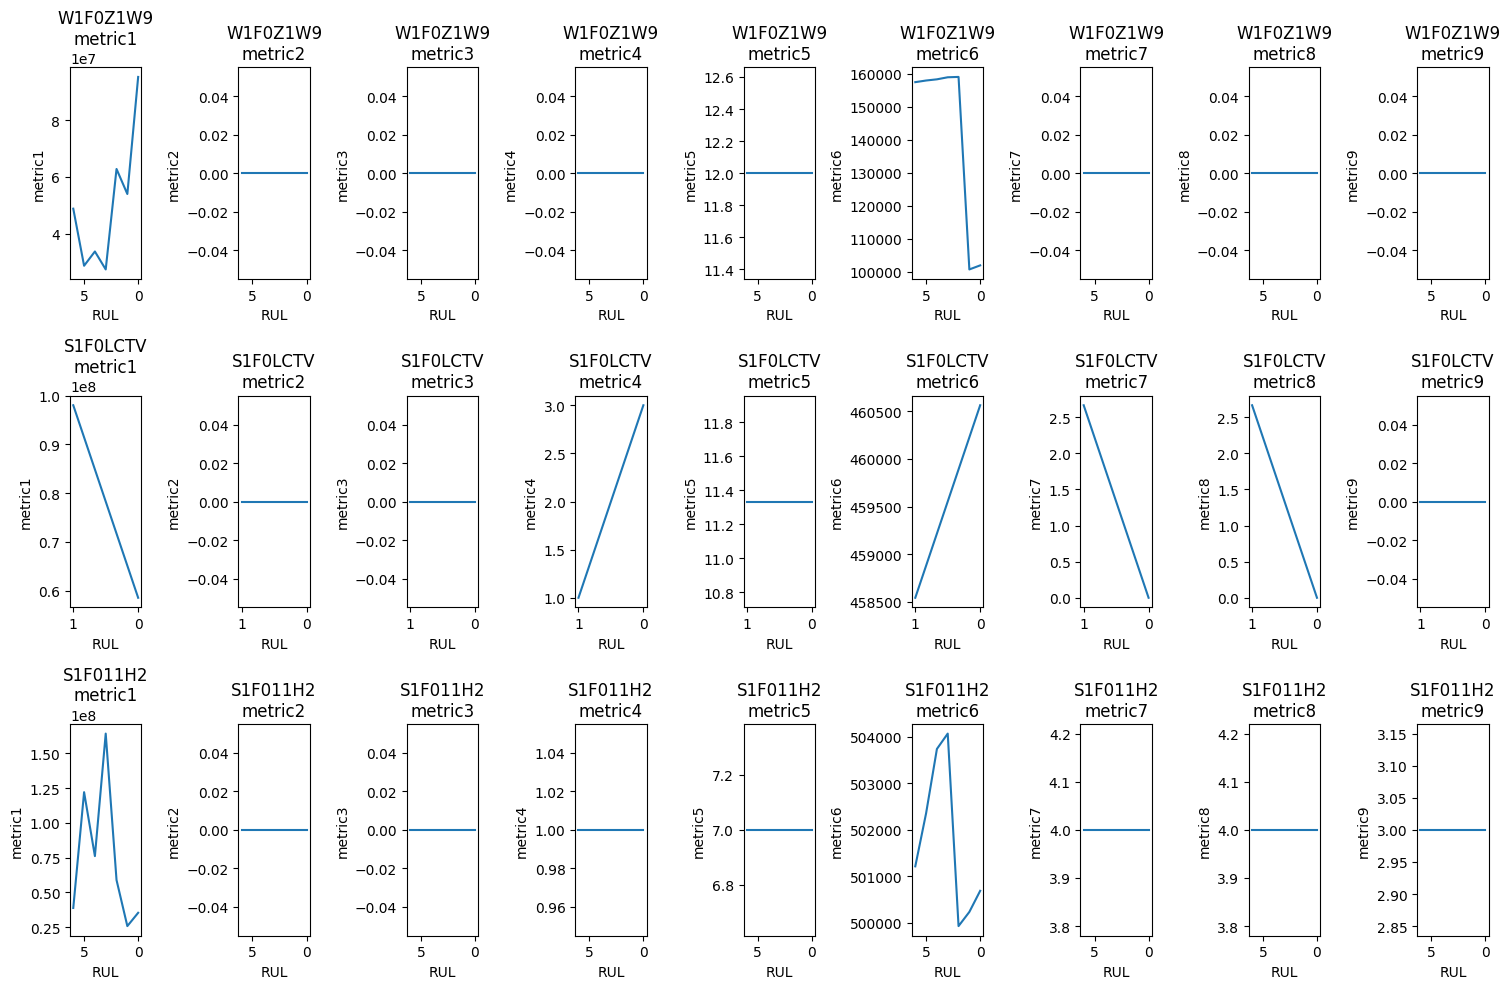

In [102]:
# prompt: 랜덤하게 device를 3개 선택하고 9개 mterics의 고장시점까지의 시계열 그래프를 그려줘 , X 축으로 날짜가 아니라 RUL 을 표시해줘

import matplotlib.pyplot as plt
import random

# 고장이력 있는 디바이스 목록 가져오기
devices_with_failure = data['device'].unique()

# 랜덤하게 3개의 디바이스 선택
selected_devices = random.sample(list(devices_with_failure), 3)

# 시계열 그래프 그리기
metrics_to_plot = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']

plt.figure(figsize=(15, 10))

for i, device in enumerate(selected_devices):
    device_data = data[data['device'] == device]

    for j, metric in enumerate(metrics_to_plot):
        plt.subplot(3, 9, i * 9 + j + 1)
        sns.lineplot(data=device_data, x='RUL', y=metric)
        plt.title(f'{device}\n{metric}')
        plt.xlabel('RUL')
        plt.ylabel(metric)
        plt.gca().invert_xaxis() # RUL은 고장시점부터 감소하므로 x축을 반전

plt.tight_layout()
plt.show()

In [103]:
# 날짜 변수 삭제
data.drop(columns=['date'],inplace=True)

In [105]:
# prompt: 훈련과 검증 데이터를 아래와 같이 모든 디바이스의 샘플을 대상으로 랜덤하게 섞지 말고, 전체 디바이스 수의 70% 디바이스들을 랜덤하게 선택하여 훈련 데이터로 사용하고 나머지 30% 디바이스의 데이터들을 검증 데이터로 나누어줘

import pandas as pd
# 고장 이력이 있는 디바이스 목록 가져오기
devices_with_failure = data['device'].unique()

# 전체 디바이스 수의 70%를 계산
num_devices = len(devices_with_failure)
num_train_devices = int(num_devices * 0.7)

# 훈련 데이터에 사용할 디바이스들을 랜덤하게 선택
train_devices = random.sample(list(devices_with_failure), num_train_devices)

# 검증 데이터에 사용할 디바이스들을 선택 (훈련 데이터에 선택되지 않은 나머지)
test_devices = [device for device in devices_with_failure if device not in train_devices]

# 선택된 디바이스들로 훈련 및 검증 데이터 분리
train_data = data[data['device'].isin(train_devices)].copy()
test_data = data[data['device'].isin(test_devices)].copy()

print(f"원본 데이터 샘플 수: {len(data)}")
print(f"훈련 데이터 샘플 수: {len(train_data)}")
print(f"검증 데이터 샘플 수: {len(test_data)}")
print(f"훈련 데이터 디바이스 수: {train_data['device'].nunique()}")
print(f"검증 데이터 디바이스 수: {test_data['device'].nunique()}")

# 특성과 타겟 변수 분리
# 'device', 'failure', 'RUL' 컬럼 제외
features = data.columns.tolist()
features.remove('device')
features.remove('failure')
features.remove('RUL')

X_train = train_data[features]
y_train_failure = train_data['failure']
y_train_rul = train_data['RUL']
train_device_ids = train_data['device'] # 디바이스 ID도 함께 분리

X_test = test_data[features]
y_test_failure = test_data['failure']
y_test_rul = test_data['RUL']
test_device_ids = test_data['device'] # 디바이스 ID도 함께 분리

# 스케일링 (훈련 데이터로 fit하고 테스트 데이터에 transform 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일링된 데이터를 다시 DataFrame 형태로 (컬럼명 유지를 위해)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)


print("\n분리 및 스케일링 후 데이터 형태:")
print("X_train_scaled:", X_train_scaled.shape)
print("y_train_failure:", y_train_failure.shape)
print("y_train_rul:", y_train_rul.shape)
print("train_device_ids:", train_device_ids.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_test_failure:", y_test_failure.shape)
print("y_test_rul:", y_test_rul.shape)
print("test_device_ids:", test_device_ids.shape)

원본 데이터 샘플 수: 4070
훈련 데이터 샘플 수: 2625
검증 데이터 샘플 수: 1445
훈련 데이터 디바이스 수: 70
검증 데이터 디바이스 수: 30

분리 및 스케일링 후 데이터 형태:
X_train_scaled: (2625, 9)
y_train_failure: (2625,)
y_train_rul: (2625,)
train_device_ids: (2625,)
X_test_scaled: (1445, 9)
y_test_failure: (1445,)
y_test_rul: (1445,)
test_device_ids: (1445,)



Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 5191.2148
Root Mean Squared Error (RMSE): 72.0501
Mean Absolute Error (MAE): 58.2838
R-squared (R2): -0.1952


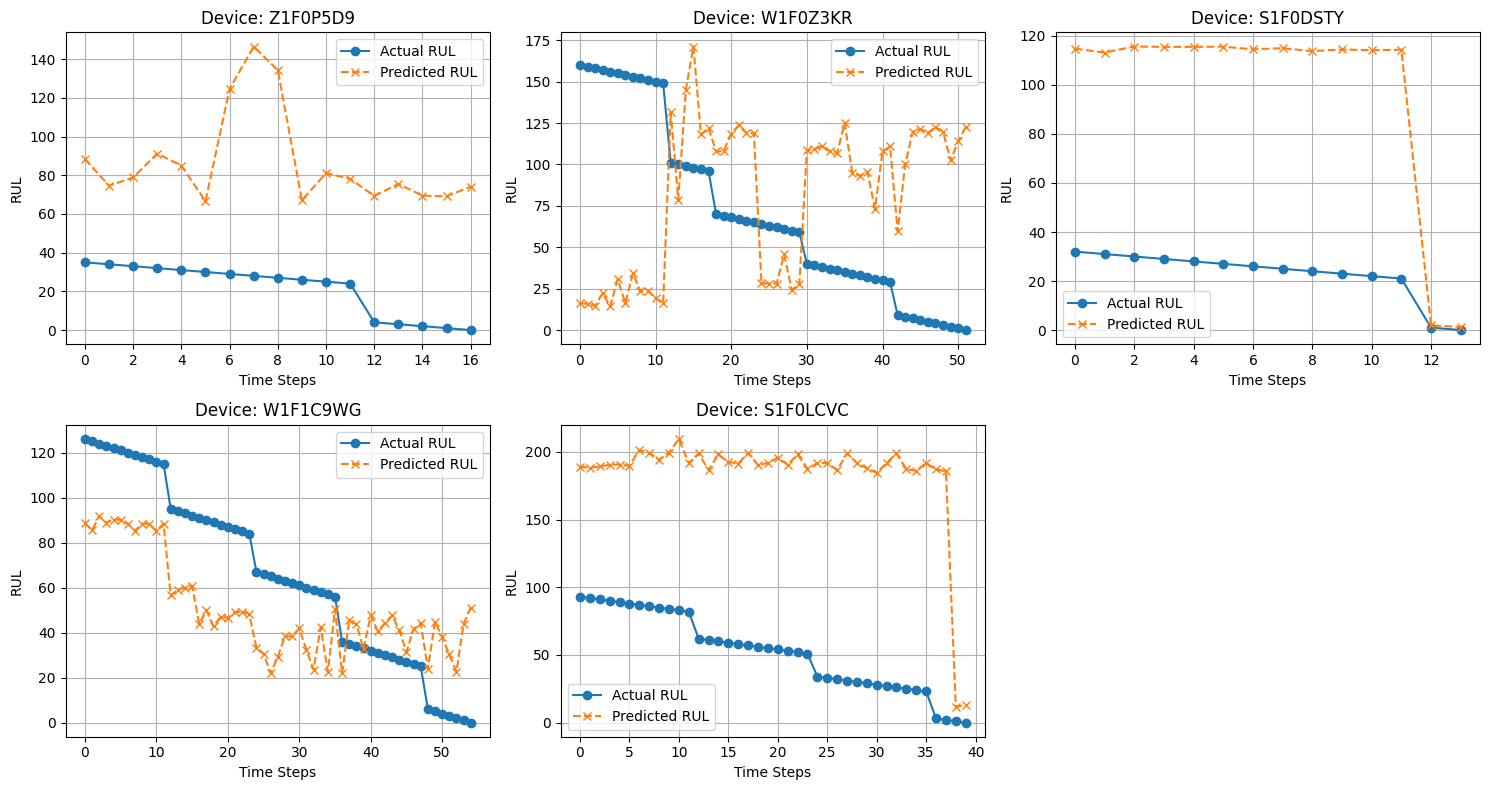

In [106]:
# prompt: 위의 나누어진 훈련데이터로 회귀 모델을 만들고 검증데이터로 검증하는 코드를 작성해줘, 랜덤 포레스트 회귀 사용

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 랜덤 포레스트 회귀 모델 초기화
# n_estimators: 트리의 개수, random_state: 재현성을 위한 시드 설정
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 훈련 데이터로 모델 학습
# 타겟 변수는 RUL (y_train_rul)
rf_regressor.fit(X_train_scaled, y_train_rul)

# 검증 데이터로 예측 수행
y_pred_rul = rf_regressor.predict(X_test_scaled)

# 모델 성능 평가
# 회귀 모델 평가 지표 사용: MSE, RMSE, MAE, R2
mse = mean_squared_error(y_test_rul, y_pred_rul)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rul, y_pred_rul)
r2 = r2_score(y_test_rul, y_pred_rul)

print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 예측 결과 시각화 (일부 디바이스에 대해)
# 검증 데이터 디바이스 중 몇 개를 선택하여 실제 RUL과 예측 RUL 비교
sample_test_devices = random.sample(list(test_device_ids.unique()), min(5, test_device_ids.nunique()))

plt.figure(figsize=(15, 8))

for i, device in enumerate(sample_test_devices):
    plt.subplot(2, 3, i + 1)
    device_indices = test_device_ids[test_device_ids == device].index
    plt.plot(y_test_rul.loc[device_indices].values, label='Actual RUL', marker='o', linestyle='-')
    plt.plot(y_pred_rul[test_device_ids == device], label='Predicted RUL', marker='x', linestyle='--') # 예측은 numpy 배열이므로 인덱스 매칭 필요
    plt.title(f'Device: {device}')
    plt.xlabel('Time Steps')
    plt.ylabel('RUL')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [104]:
# 목적변수와 디바이스명 삭제하고 나머지 데이터를 X로 사용
fc=data.columns.difference(['RUL', 'device'])
X=data[fc]
y=data['RUL']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f'R score:{r2:.3f}')

R score:0.906


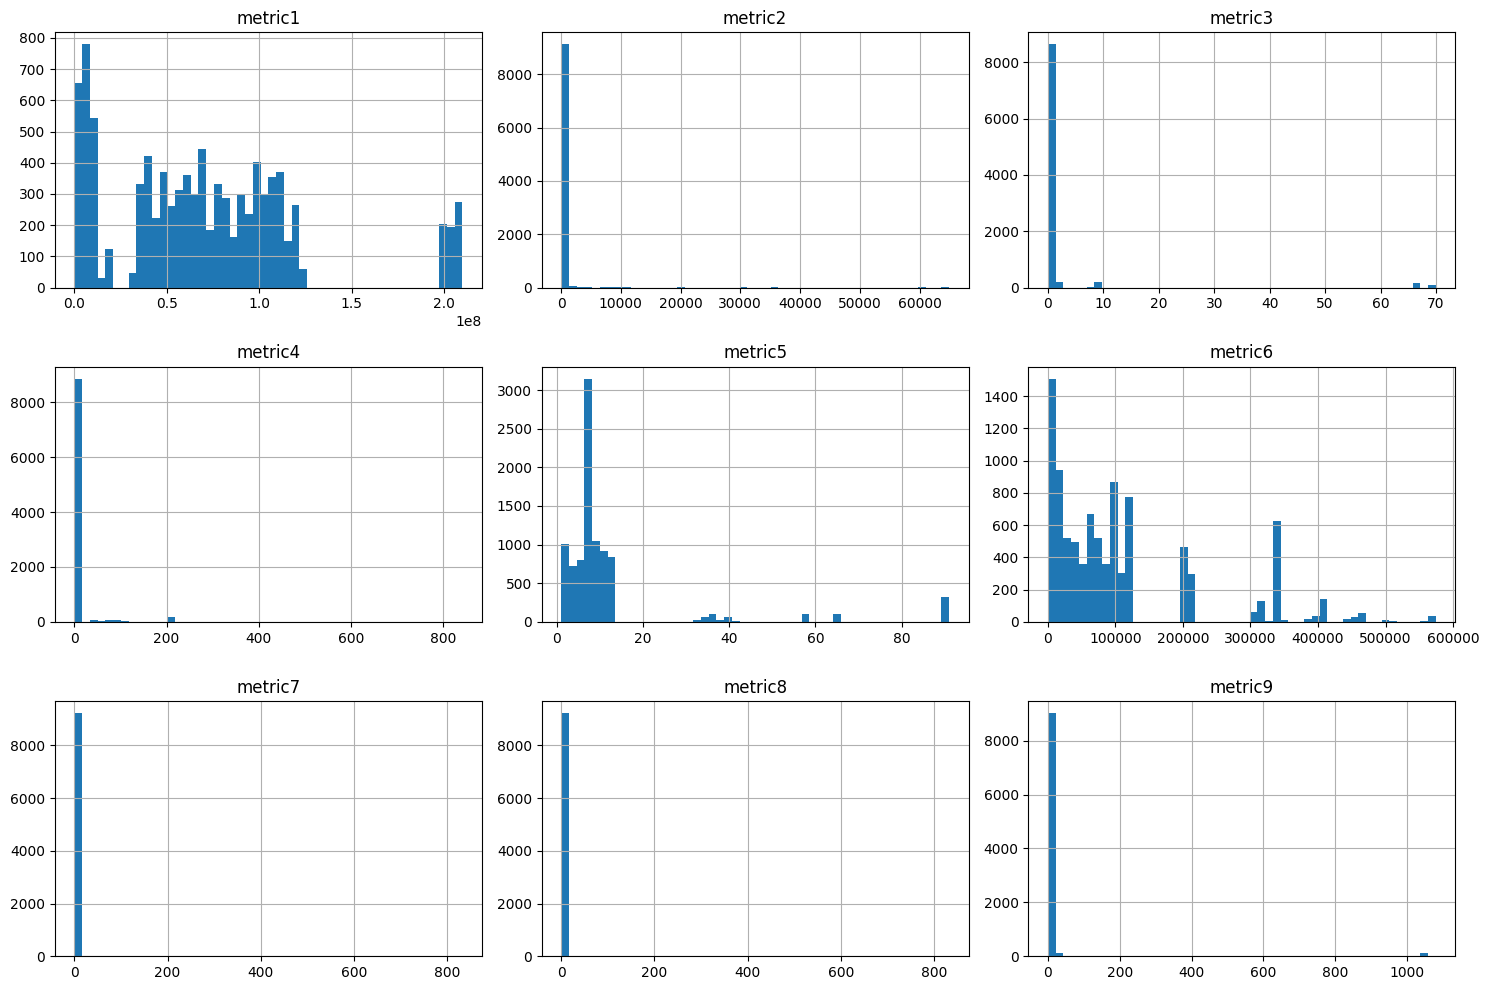

In [94]:
# 각 metric 컬럼의 분포 시각화 (예: 히스토그램)

metrics = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']
data[metrics].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

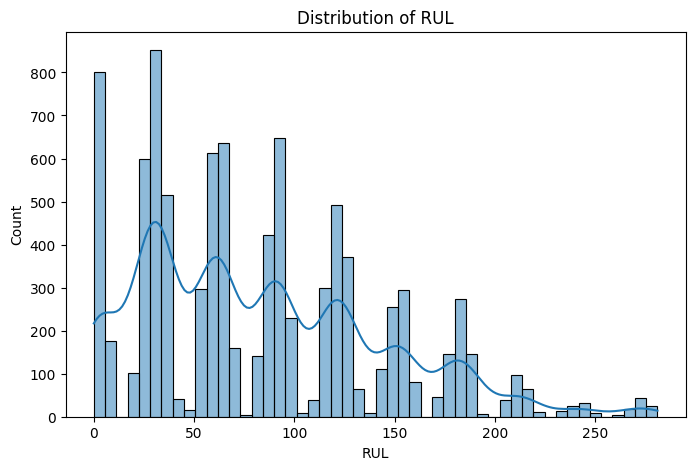

In [38]:

# 'RUL' 컬럼의 분포 확인
plt.figure(figsize=(8, 5))
sns.histplot(data['RUL'], bins=50, kde=True)
plt.title('Distribution of RUL')
plt.show()


In [95]:
# 샘플 데이터가 가장 많은 상위 3개 device 찾기
top_5_devices = data['device'].value_counts().nlargest(3).index.tolist()
print("샘플 데이터가 가장 많은 상위 3개 Device:")
print(top_5_devices)

샘플 데이터가 가장 많은 상위 3개 Device:
['Z1F02BGY', 'W1F0T0B1', 'S1F0JGJV']


In [97]:
data_aggregated[data_aggregated.device=='W1F0T0B1'][-20:]

,device,date,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,failure,RUL
2455,W1F0T0B1,2003-08-07,7.490321e+07,0.0,0.0,0.000000,8.000000,62308.000000,8.0,8.0,0.0,0,56
2456,W1F0T0B1,2003-08-08,8.051888e+07,0.0,0.0,0.000000,8.000000,62730.500000,8.0,8.0,0.0,0,55
2457,W1F0T0B1,2003-08-09,1.080675e+08,0.0,0.0,0.000000,8.000000,62730.500000,8.0,8.0,0.0,0,54
2458,W1F0T0B1,2003-08-10,4.354064e+07,0.0,0.0,0.000000,8.000000,61096.000000,8.0,8.0,0.0,0,53
2459,W1F0T0B1,2003-08-11,3.866478e+07,0.0,0.0,0.000000,8.000000,62532.500000,8.0,8.0,0.0,0,52
2460,W1F0T0B1,2003-08-12,1.420408e+08,0.0,0.0,0.000000,8.000000,63421.500000,8.0,8.0,0.0,0,51
2461,W1F0T0B1,2003-09-01,8.085362e+07,0.0,0.0,0.000000,8.000000,48989.333333,8.0,8.0,0.0,0,31
2462,W1F0T0B1,2003-09-02,6.328437e+07,0.0,0.0,0.000000,8.000000,130674.000000,8.0,8.0,0.0,0,30
2463,W1F0T0B1,2003-09-03,5.925164e+07,0.0,0.0,0.000000,8.000000,139451.000000,8.0,8.0,0.0,0,29
2464,W1F0T0B1,2003-09-04,4.198163e+07,0.0,0.0,0.000000,8.000000,139374.666667,8.0,8.0,0.0,0,28


In [47]:
data

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,RUL,day_of_week,month
473,S1F00389,0,1021040,0,0,0,4,69879,0,0,0,124,2,1
11733,S1F00389,0,60005040,0,0,0,4,62049,0,0,0,124,2,1
20314,S1F00389,0,107691056,0,0,0,4,64576,0,0,0,124,2,1
1636,S1F00389,0,50597704,0,0,0,4,21094,0,0,0,123,3,1
12465,S1F00389,0,205062088,0,0,0,4,63506,0,0,0,123,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93295,Z1F1VQFY,0,66703784,0,0,0,7,23851,0,0,0,1,3,6
97469,Z1F1VQFY,0,12090022,0,0,0,7,25064,0,0,0,1,3,6
89439,Z1F1VQFY,0,45637016,0,0,0,7,23837,0,0,0,0,4,6
93644,Z1F1VQFY,0,114601112,0,0,0,7,23851,0,0,0,0,4,6
